# Agent-based model Quickstart guide

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from abm import ABM, ABM_Plotter, ParallelABM, load_population_dataset

# Running the simulation

## Running a basic simulation

We must first set up the model's parameters, using a dictionary:

In [34]:
params = {
        'inf_params': {'age': 0.000},
        'test_params': {'age': 0.000},
        'inf_fraction_param': 30,
        'inf_lvl_error_term': -15,
        'inf_proba_sigmoid_slope': 1.0,
        'test_inf_lvl_param': 0.1,
        'test_error_term': -15,
        'test_proba_sigmoid_slope': 10.0,
        'recovery_mean_time': 8.0,
        'recovery_std_time': 2.0
}

We then need to set up the initial conditions. To do so, we need to define a fixed number of infections for the first few days of the simulation. The infections created during this phase will be spread uniformly within the population:

In [35]:
# Defines a linearly increasing initial infections curve, for the first 10 days.
initial_infections = np.arange(10) * 10
print(initial_infections)

[ 0 10 20 30 40 50 60 70 80 90]


We can now create the ```ABM``` object, which will load the mobility data. The default data paths need to be specified in ```simulation_config.yml```.

In [36]:
abm = ABM(params)
# Initializes the simulation
abm.force_simulation_start(initial_infections)

Loading activity data...
Processing period 0
Processing period 1
Processing period 2
Processing period 3
Processing period 4
Processing period 5
Processing period 6
Processing period 7
Processing period 8
Processing period 9
Processing period 10
Processing period 11
Processing period 12
Processing period 13
Processing period 14
Processing period 15
Processing period 16
Processing period 17
Processing period 18
Processing period 19
Processing period 20
Processing period 21
Processing period 22
Processing period 23


We can finally run the simulation:

In [37]:
simulation_days = 60
abm.run_simulation(simulation_days, verbose=True)

Day  0
Day  1
Day  2
Day  3
Day  4
Day  5
Day  6
Day  7
Day  8
Day  9
Day  10
Day  11
Day  12
Day  13
Day  14
Day  15
Day  16
Day  17
Day  18
Day  19
Day  20
Day  21
Day  22
Day  23
Day  24
Day  25
Day  26
Day  27
Day  28
Day  29
Day  30
Day  31
Day  32
Day  33
Day  34
Day  35
Day  36
Day  37
Day  38
Day  39
Day  40
Day  41
Day  42
Day  43
Day  44
Day  45
Day  46
Day  47
Day  48
Day  49
Day  50
Day  51
Day  52
Day  53
Day  54
Day  55
Day  56
Day  57
Day  58
Day  59
Simulation ended. 


The results can be retrieved using ```abm.results.get_daily_results()``` (for daily-aggregated results) or ```abm.results.get_per_period_results()``` (for the simulation state after every single period):

In [38]:
results = abm.results.get_daily_results()
results.head()

,daily summed new infections,daily summed infected agents,daily summed recovered agents,daily summed tests,daily summed positive tests,daily avg new infections,daily avg infected agents,daily avg recovered agents,daily avg tests,daily avg positive tests,day
day,,,,,,,,,,,
0,0,0,0,0,0,0.000000,0.000000,0.0,0.0,0.0,0
1,5,72,0,0,0,0.208333,3.000000,0.0,0.0,0.0,1
2,20,391,0,0,0,0.833333,16.291667,0.0,0.0,0.0,2
3,37,1009,0,0,0,1.541667,42.041667,0.0,0.0,0.0,3
4,35,1932,0,0,0,1.458333,80.500000,0.0,0.0,0.0,4


In [39]:
abm.results.get_per_period_results().head()

,new infections,infected agents,recovered agents,tests,positive tests,period,day
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,0,3,0
4,0,0,0,0,0,4,0


Finally, the ```ABM_Plotter``` class has predefined methods to display the results:

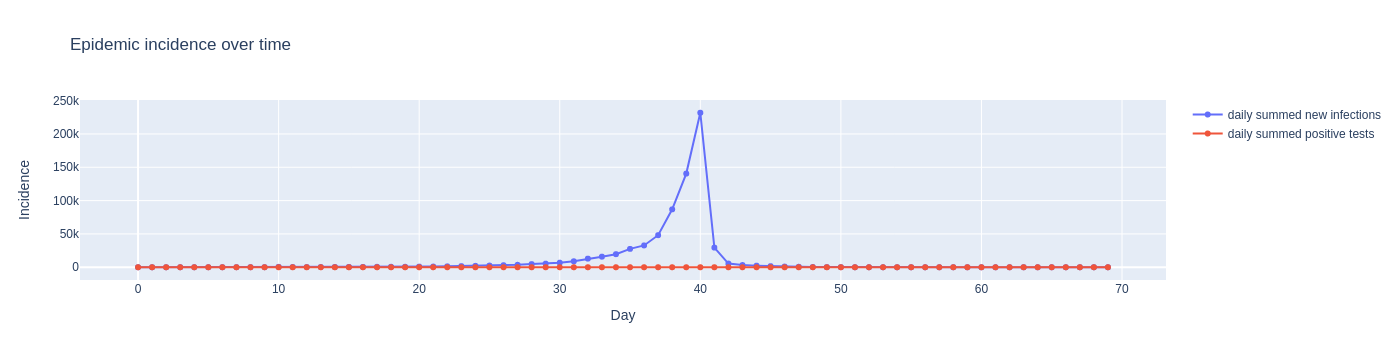

In [40]:
plotter = ABM_Plotter(abm)
# Displays the new infections and positive tests, and saves the image.
plotter.plot_curves(show_fig=True, save_img_to="tests/figures/simulation.jpg")

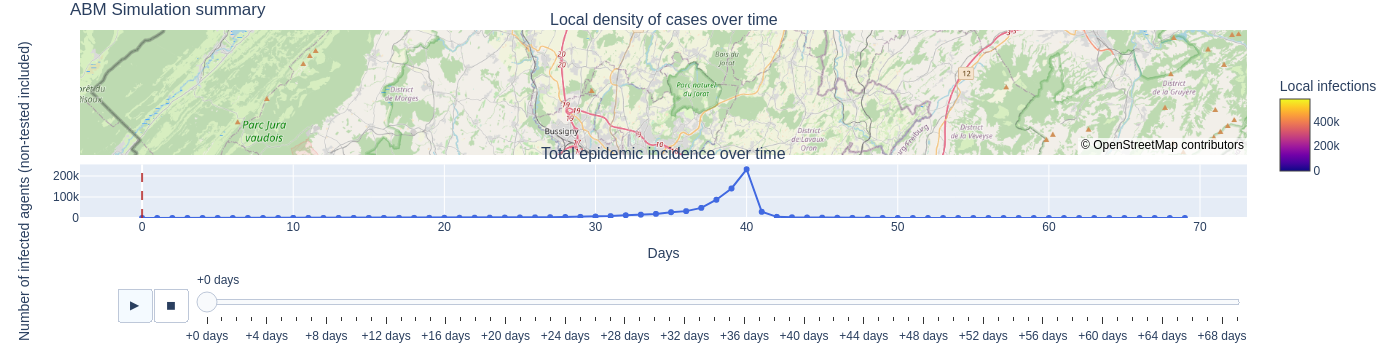

In [41]:
# For the following display, we need to load the population dataset, which contains the agents'
# homes' geographical coordinates:
population_dataset = load_population_dataset()
plotter.plot_infection_spread(population_dataset, show_fig=True)

## Resetting and changing parameters
The ```ABM``` class allows re-run the simulation with different parameters, without reloading the full data:

In [43]:
# Some examples of how to change parameters
abm.set_param('inf_fraction_param', 27)
abm.set_param('inf_params', {'age': 0.001}, population_dataset)

In [44]:
# Resetting the ABM is done simply by setting the initial conditions again:
abm.force_simulation_start(initial_infections)

Day  0
Day  1
Day  2
Day  3
Day  4
Day  5
Day  6
Day  7
Day  8
Day  9
Day  10
Day  11
Day  12
Day  13
Day  14
Day  15
Day  16
Day  17
Day  18
Day  19
Day  20
Day  21
Day  22
Day  23
Day  24
Day  25
Day  26
Day  27
Day  28
Day  29
Day  30
Day  31
Day  32
Day  33
Day  34
Day  35
Day  36
Day  37
Day  38
Day  39
Day  40
Day  41
Day  42
Day  43
Day  44
Day  45
Day  46
Day  47
Day  48
Day  49
Day  50
Day  51
Day  52
Day  53
Day  54
Day  55
Day  56
Day  57
Day  58
Day  59
Simulation ended. 


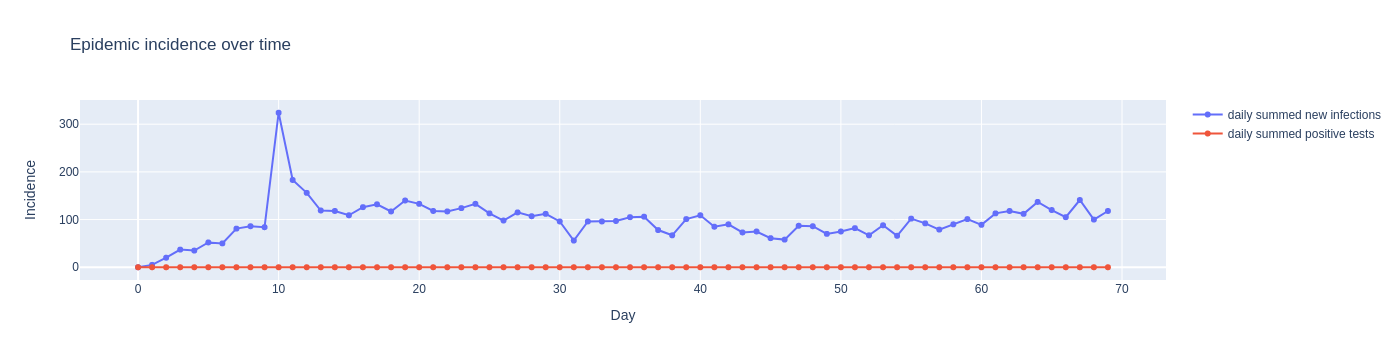

In [45]:
abm.run_simulation(simulation_days, verbose=True)
ABM_Plotter(abm).plot_curves(show_fig=True)